# DS 3000 - Assignment [5]

**Student Name**: [Caroline Campbell, Ethan Chin, Kathleen Wang, Brian Wong]

**Date**: [2/5/2025]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

___________________________________________________________________________

You are given the task of performing a comprehensive analysis of this dataset. However, due to the volume of data, a subset has been extracted for you for all flights that originated or departed from the following states in 2019: Arizona: AZ, Nevada: NV and California: CA.

<b>The goal for this practicum is to explore flight delays to: 1) analyze the air traffic at certain airports/regions and 2) evaluate which  airlines/carriers are more prone to delays. </b>

(Download files are in the assignment's page)

## Question 1 — The DS Problem

1. In your own words, formulate the Data Science problem that you were given.


Using a subset of data about flights in 2019 in the states AZ, NV, and CA, analyze the flight data to examine air traffic patterns, and identify the airline/carrier that is most likely to be delayed.





## Question 2 — Prepare the Data (10 pts)

1. Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).

2. Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.

3. At a high level, provide an overview of the dataset; prepare summary statistics and at least three visualizations to support your explanation. Note: the explanation and visualizations should be relevant to the DS Problem in question 1.

Question 2.1

In [ ]:
import pandas as pd
import gdown # file too large so needed this to download

file_id = "1R3wtv39NUbdAmxjkd2HH903ykP9pWf_-"
output = "2019_ONTIME_REPORTING_FSW.csv"

gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}",
               output, quiet=False)

df = pd.read_csv(output)
df.head()

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1R3wtv39NUbdAmxjkd2HH903ykP9pWf_-
From (redirected): https://drive.google.com/uc?export=download&id=1R3wtv39NUbdAmxjkd2HH903ykP9pWf_-&confirm=t&uuid=9c58f522-38a6-48b7-b821-e6790c9b5fd2
To: /content/2019_ONTIME_REPORTING_FSW.csv
100%|██████████| 117M/117M [00:01<00:00, 65.4MB/s]


,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947


In [ ]:
df.dtypes

,0
FL_DATE,object
CARRIER_CODE,object
TAIL_NUM,object
FL_NUM,int64
ORIGIN,object
ORIGIN_ST,object
DEST,object
DEST_ST,object
DEP_TIME,float64
DEP_DELAY,float64


In [ ]:
df['FL_DATE'] = df['FL_DATE'].astype('datetime64[ns]')
df['CARRIER_CODE'] = df['CARRIER_CODE'].astype('string')
df['TAIL_NUM'] = df['TAIL_NUM'].astype('string')
df['ORIGIN'] = df['ORIGIN'].astype('string')
df['ORIGIN_ST'] = df['ORIGIN_ST'].astype('string')
df['DEST'] = df['DEST'].astype('string')
df['DEST_ST'] = df['DEST_ST'].astype('string')

In [ ]:
df.dtypes

,0
FL_DATE,datetime64[ns]
CARRIER_CODE,string[python]
TAIL_NUM,string[python]
FL_NUM,int64
ORIGIN,string[python]
ORIGIN_ST,string[python]
DEST,string[python]
DEST_ST,string[python]
DEP_TIME,float64
DEP_DELAY,float64


Question 2.2

In [ ]:
df.isnull().sum()

,0
FL_DATE,0
CARRIER_CODE,0
TAIL_NUM,4791
FL_NUM,0
ORIGIN,0
ORIGIN_ST,0
DEST,0
DEST_ST,0
DEP_TIME,26707
DEP_DELAY,26715


In [ ]:
# Replace placeholders and unwanted values
df.replace(['', 'NaN'], pd.NA, inplace=True)

# Keep only flight numbers with three to four letter ID
df = df[df['FL_NUM'].astype(str).str.len().between(3, 4)]

# Keep only time less than or equal to 23:59 since using military time
df = df[(df['DEP_TIME'] <= 2359) & (df['ARR_TIME'] <= 2359)]

# Drop rows with missing values in specific columns
df.dropna(subset=['DEP_DELAY', 'ARR_DELAY', 'TAIL_NUM', 'ELAPSED_TIME'], inplace=True)

In [ ]:
df.isnull().mean()*100

,0
FL_DATE,0.0
CARRIER_CODE,0.0
TAIL_NUM,0.0
FL_NUM,0.0
ORIGIN,0.0
ORIGIN_ST,0.0
DEST,0.0
DEST_ST,0.0
DEP_TIME,0.0
DEP_DELAY,0.0


We decided to handle missing and invalid data by removing the entire row that contains the missing or invalid data. We decided with this approach because imputation might distort individual aircraft and airline performances. If an airline or specific aircraft has a lot of missing data and we replace it with the median, then that airline would look more or less reliable than it actually is. Additionally, since we are trying to examine air traffic patterns, and identify the airline/carrier that is most likely to be delayed, it would be best not to use imputation on the missing data which could change the air traffic patterns and our ability to identify the airline that is most likely to delay. We also filtered out flight numbers that weren't 3-4 letters, and arrival time and departure times that were over 2359 since we were using military time since we didn't want to affect the performance of airlines.

Question 2.3

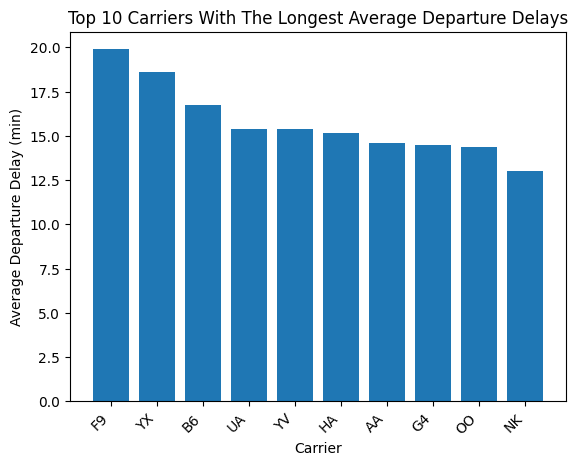

In [ ]:
import matplotlib.pyplot as plt

# To answer the problem, we want to look at the carriers with the highest departure delays to
# understand which carriers tend to be delayed the most on average

# group by carrier and calculate average departure delay
depart_avg_delay = df.groupby("CARRIER_CODE")["DEP_DELAY"].mean().sort_values(ascending=False)

# get top 10 carriers with highest departure delays
longest_avg_depart_delays = depart_avg_delay.head(10)

# create bar plot of results
plt.bar(longest_avg_depart_delays.index, longest_avg_depart_delays.values)
plt.title("Top 10 Carriers With The Longest Average Departure Delays")
plt.xlabel("Carrier")
plt.ylabel("Average Departure Delay (min)")
plt.xticks(rotation=45, ha="right")
plt.show()

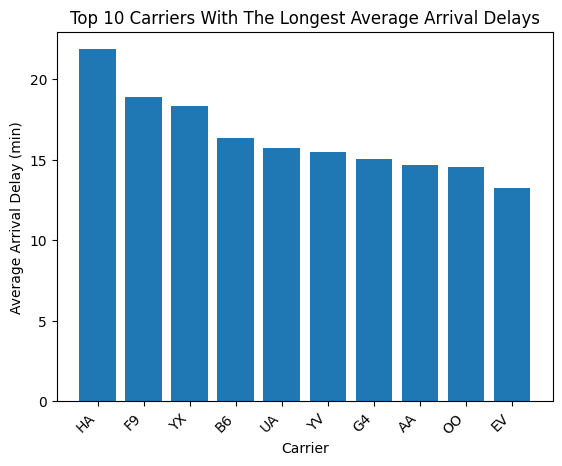

In [ ]:
# We also want to look at the carriers with the highest arrival delays as well that way
# we have a more comprehensive understanding of which carriers tend to be delayed the most

# group by carrier and calculate average arrival delay
arrive_avg_delay = df.groupby("CARRIER_CODE")["ARR_DELAY"].mean().sort_values(ascending=False)

# get top 10 carriers with highest arrival delays
longest_avg_arrive_delays = arrive_avg_delay.head(10)

# create bar plot of results
plt.bar(longest_avg_arrive_delays.index, longest_avg_arrive_delays.values)
plt.title("Top 10 Carriers With The Longest Average Arrival Delays")
plt.xlabel("Carrier")
plt.ylabel("Average Arrival Delay (min)")
plt.xticks(rotation=45, ha="right")
plt.show()

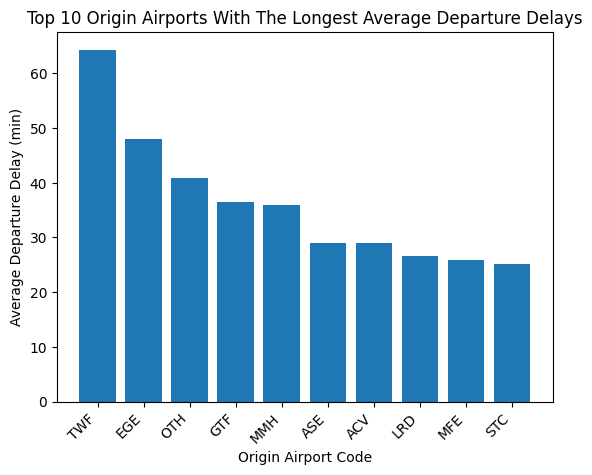

In [ ]:
# It is also worth noting the origin airports that tend to be delayed the most, as this might
# play a part as to why certain carriers might be delayed longer on average

# group by origin airport and calculate average departure delay
origin_depart_delay = df.groupby('ORIGIN')['DEP_DELAY'].mean().sort_values(ascending=False)

# get top 10 origin airports with longest average delays
longest_origin_depart_delay = origin_depart_delay.head(10)

# create bar plot of results
plt.bar(longest_origin_depart_delay.index, longest_origin_depart_delay.values)
plt.xlabel("Origin Airport Code")
plt.ylabel('Average Departure Delay (min)')
plt.title('Top 10 Origin Airports With The Longest Average Departure Delays')
plt.xticks(rotation=45, ha='right')
plt.show()

From a quick overview of the dataset, we can see that the airlines with the longest average departure delays also have the longest average arrival delays as well, with the exception of one airline. It is also worth noting that TWF has significantly more departure delays than other origin airports, with an average delay of over an hour.

## Question 3 — (20 points)


1. Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the <b>most air traffic</b>. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.

2. For each region i.e. the 3 states (AZ, NV, CA), analyze the <b>most popular</b> outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.

3. For each region, calculate the <b>proportion*</b> of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*<b>Hint</b>: Don't forget that proportion is an explicit requirement.

In [ ]:
region = df[df['ORIGIN_ST'].isin(['AZ', 'CA', 'NV'])]
df.head()

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947


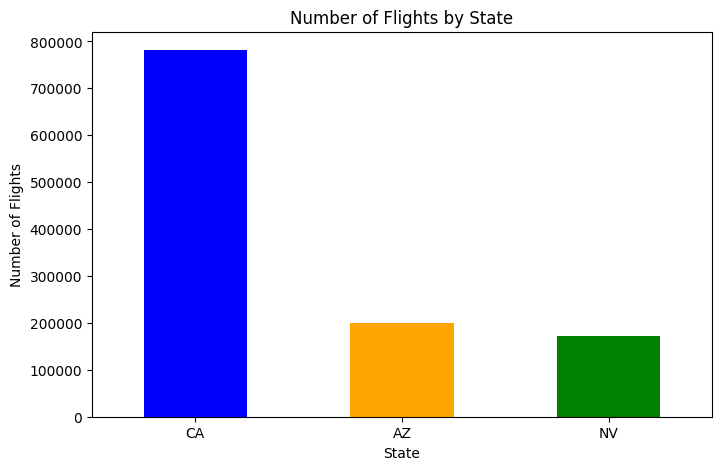

In [ ]:
flight_counts = region['ORIGIN_ST'].value_counts()
flight_counts

# Plot the bar chart
plt.figure(figsize=(8,5))
flight_counts.plot(kind='bar', color=['blue', 'orange', 'green'])

# Add labels and title
plt.title('Number of Flights by State')
plt.xlabel('State')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)  # Keep state labels horizontal

# Show the plot
plt.show()

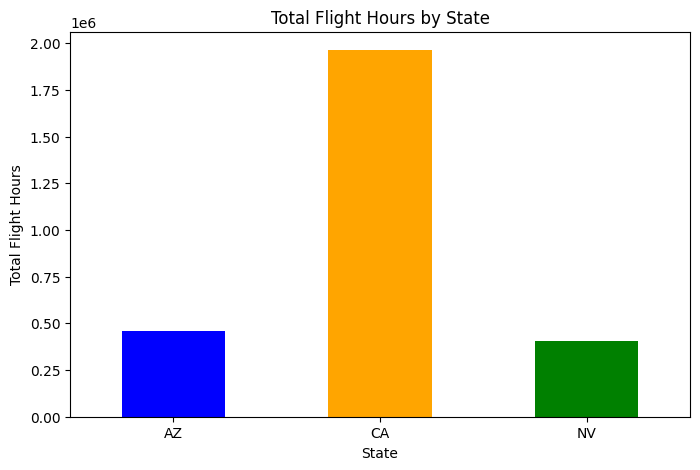

In [ ]:
flight_time = region.groupby('ORIGIN_ST')['ELAPSED_TIME'].sum()
flight_time

# Convert total flight time from minutes to hours
flight_time_hours = flight_time / 60

# Plot the bar chart
plt.figure(figsize=(8,5))
flight_time_hours.plot(kind='bar', color=['blue', 'orange', 'green'])

# Add labels and title
plt.title('Total Flight Hours by State')
plt.xlabel('State')
plt.ylabel('Total Flight Hours')
plt.xticks(rotation=0)  # Keep state labels horizontal

# Show the plot
plt.show()

California has the most air traffic, whether when looking at the number of flights or comparing the total flight time.

Question 3.2

In [ ]:
top_destinations = (region.groupby(['ORIGIN_ST', 'DEST']).size()
    .reset_index(name='Flight_Count')
    .sort_values(by=['ORIGIN_ST', 'Flight_Count'],
                 ascending=[True, False]))

top_5 = top_destinations.groupby('ORIGIN_ST').head(5)
top_5

,ORIGIN_ST,DEST,Flight_Count
27,AZ,DEN,10168
60,AZ,LAX,9584
28,AZ,DFW,7573
114,AZ,SEA,6828
59,AZ,LAS,6636
221,CA,PHX,48792
190,CA,LAS,46718
240,CA,SFO,43947
239,CA,SEA,43140
191,CA,LAX,39811


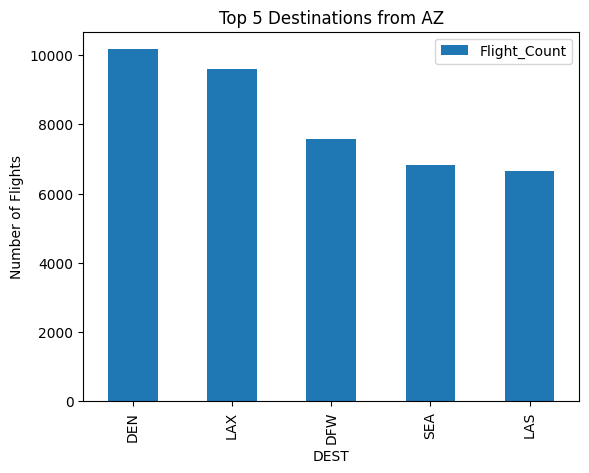

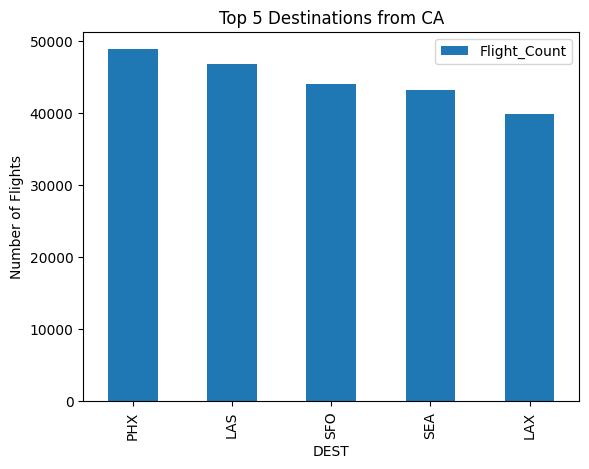

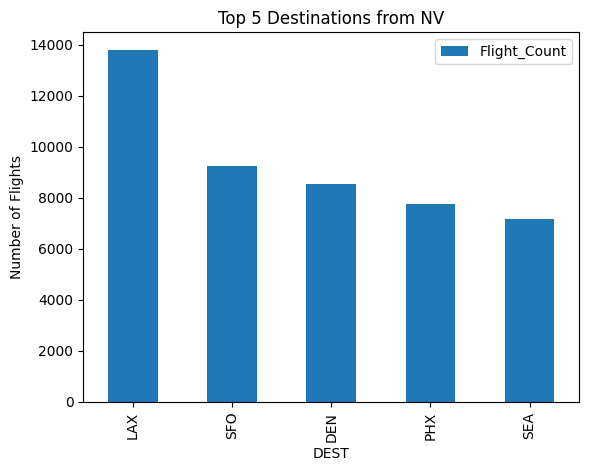

In [ ]:
import matplotlib.pyplot as plt

for state in ['AZ', 'CA', 'NV']:
    state_data = top_5[top_5['ORIGIN_ST'] == state]
    ax = state_data.plot(
        x='DEST',
        y='Flight_Count',
        kind='bar',
        title=f'Top 5 Destinations from {state}')
    ax.set_ylabel('Number of Flights')
    plt.show()


Based on our findings, the top destinations from AZ are DEN at over 10,000 followed by LAX,with a slight drop, then DFW with a bigger drop of 1,000, then closely followed by SEA and LAS which are both at about 7,000.
The top destinations from CA are PHX at nearly 50,000, then closely followed by LAS, SFO, SEA, and LAX where each destination have a drop of about 1,000 number of flights from the previous.
The top destinations from NV are LAX at nearly 14,000, then a huge drop at SFO at about 9,000, then DEN, PHX, and SEA.

Question 3.3

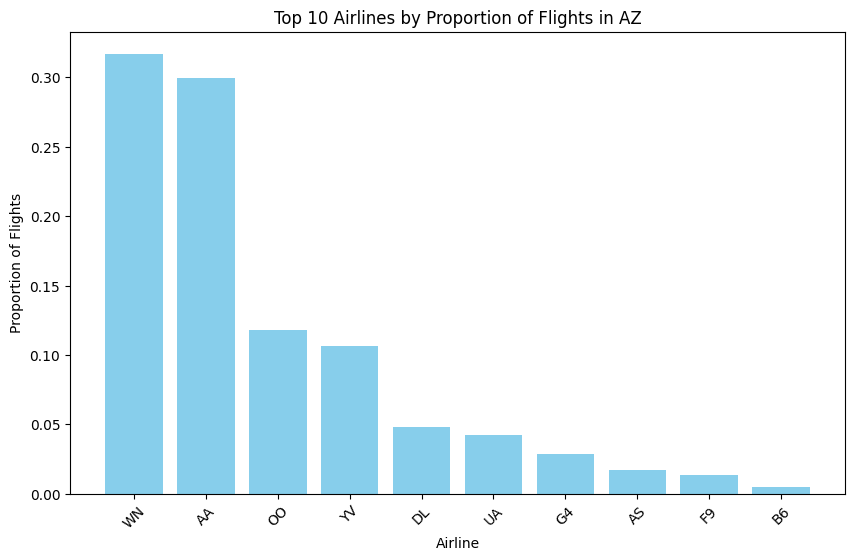

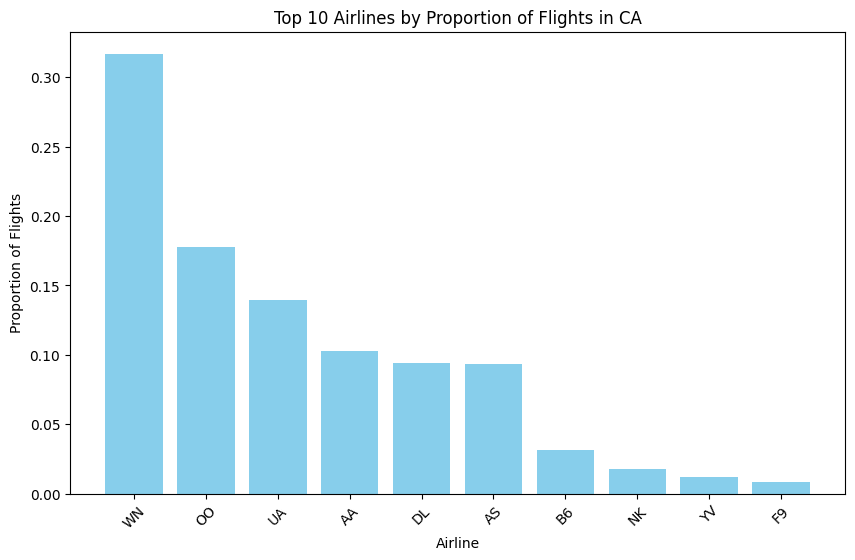

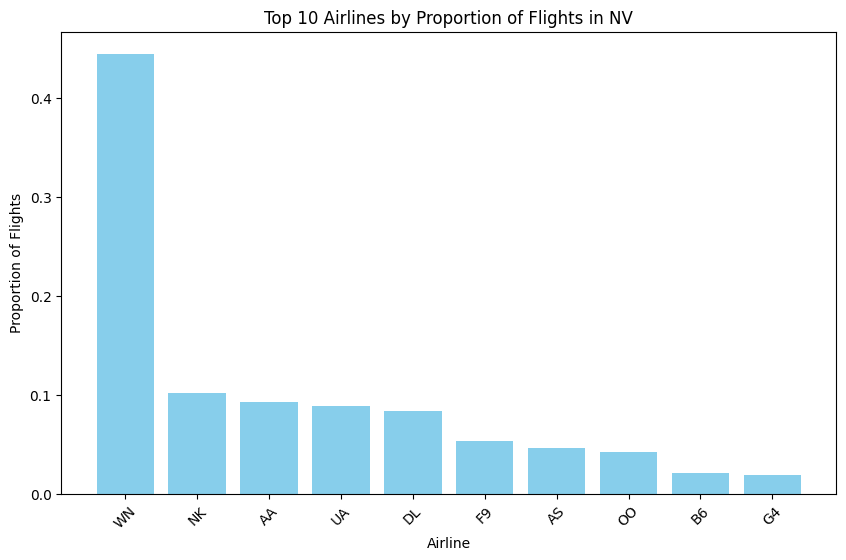

In [ ]:
import matplotlib.pyplot as plt

# Group by region and airline to calculate the number of flights per airline
flights_per_airline_region = region.groupby(['ORIGIN_ST', 'CARRIER_CODE']).size()

# Calculate the total flights in each region
total_flights_per_region = region.groupby('ORIGIN_ST').size()

# Calculate the proportion of flights for each airline in each region
proportion_flights = flights_per_airline_region / total_flights_per_region

# Reset index to make it easier for plotting
proportion_flights = proportion_flights.reset_index(name='Proportion')

# Plot the top 10 airlines by region for proportion of flights
for state in ['AZ', 'CA', 'NV']:
    state_proportion = proportion_flights[proportion_flights['ORIGIN_ST'] == state]

    # Sort by proportion and take the top 10 airlines
    top_10_airlines = state_proportion.sort_values(by='Proportion', ascending=False).head(10)

    # Plot the bar chart for the top 10 airlines
    plt.figure(figsize=(10,6))
    plt.bar(top_10_airlines['CARRIER_CODE'], top_10_airlines['Proportion'], color='skyblue')
    plt.title(f'Top 10 Airlines by Proportion of Flights in {state}')
    plt.xlabel('Airline')
    plt.ylabel('Proportion of Flights')
    plt.xticks(rotation=45)
    plt.show()

<br>For the region AZ, the airline with the highest proportion of flights is WN at about 31% of flights closely followed by AA at about 30%. There is then a significant drop off for airline OO at about 12%, then closely followed by airline YV at 11%. There is the a moderate drop off for airline DL at about 5%, then UA, G4, AS, F9, and B6 where each drop about .05% from 5%.</br>
<br>For the region CA, the airline with the highest proportion of flights is WN at about 31% of flights, then a significant drop off for airline OO at about 17%, then a moderate drop for airline UA at about 14%, then another moderate drop for airline AA at about 10%, then a minor drop for airlines DL and AS at about 9.5% each, then another moderate drop for airline B6 at about 3.5%, then airlines NK, YV, and F9 with drops of about .05% each from 3.5%.</br>
<br>For the region NV, the airline with the highest proportion of flights is WN at about 45% of flights, then a significant drop for airline NK at about 10%, then airlines AA, UA, and DL with drops of about .02% from 10%, then a moderate drop for airline F9 at about 5%, then airlines AS and OO with drops of about .02% from 5%, then airlines B6 and G4 at about 2% each.</br>

## Question 4 — (20 points)


1. Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.

2. Analyze the <b>minimum, maximum</b> and <b>average arrival and departure</b> delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**<b>Tip</b>: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.

Question 4.1

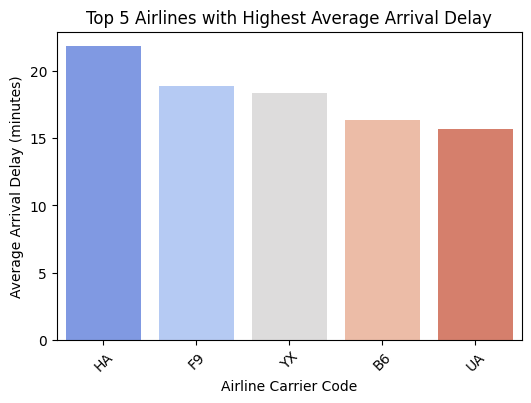

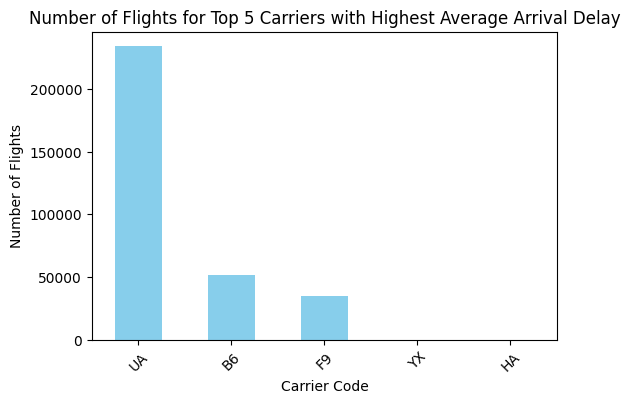

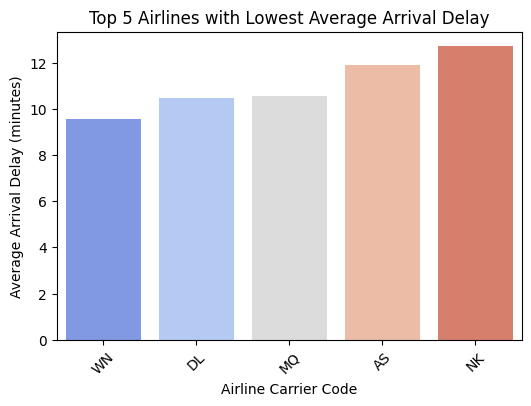

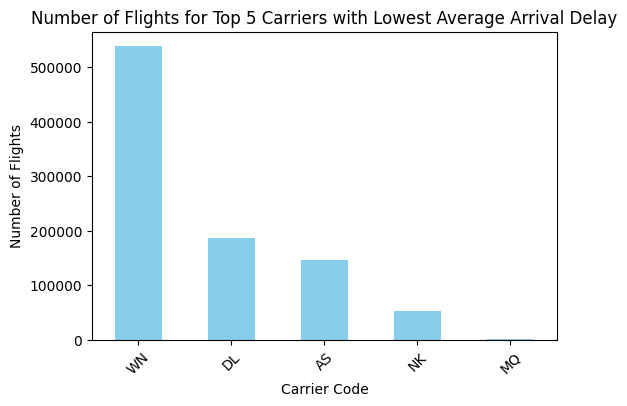

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numerical data for delays
df['ARR_DELAY'] = pd.to_numeric(df['ARR_DELAY'], errors='coerce')
df['DEP_DELAY'] = pd.to_numeric(df['DEP_DELAY'], errors='coerce')

# Analyze minimum, maximum, and average arrival and departure delays per airline
carrier_delays = df.groupby('CARRIER_CODE')[['ARR_DELAY', 'DEP_DELAY']].agg(['min', 'max', 'mean']).reset_index()
carrier_delays.columns = ['CARRIER_CODE', 'ARR_MIN', 'ARR_MAX', 'ARR_MEAN', 'DEP_MIN', 'DEP_MAX', 'DEP_MEAN']

# Select top 5 carriers with highest average arrival delay
top_5_carriers_highest = carrier_delays.nlargest(5, 'ARR_MEAN')

# Plot top 5 airlines with highest average arrival delay
plt.figure(figsize=(6, 4))
sns.barplot(x='CARRIER_CODE', y='ARR_MEAN', data=top_5_carriers_highest, hue='CARRIER_CODE', palette='coolwarm', legend=False)
plt.title('Top 5 Airlines with Highest Average Arrival Delay')
plt.xlabel('Airline Carrier Code')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

# Get the number of flights for each of the top 5 carriers with highest arrival delay
top_5_flight_counts_highest = df[df['CARRIER_CODE'].isin(top_5_carriers_highest['CARRIER_CODE'])].groupby('CARRIER_CODE').size()

# Sort the flight counts in ascending order
top_5_flight_counts_lowest_sorted = top_5_flight_counts_highest.sort_values(ascending=False)

# Plot the bar chart for top 5 carriers with highest arrival delay
plt.figure(figsize=(6, 4))
top_5_flight_counts_lowest_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Flights for Top 5 Carriers with Highest Average Arrival Delay')
plt.xlabel('Carrier Code')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

# Select top 5 carriers with lowest average arrival delay
top_5_carriers_lowest = carrier_delays.nsmallest(5, 'ARR_MEAN')

# Plot top 5 airlines with lowest average arrival delay
plt.figure(figsize=(6, 4))
sns.barplot(x='CARRIER_CODE', y='ARR_MEAN', data=top_5_carriers_lowest, hue='CARRIER_CODE', palette='coolwarm', legend=False)
plt.title('Top 5 Airlines with Lowest Average Arrival Delay')
plt.xlabel('Airline Carrier Code')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

# Get the number of flights for each of the top 5 carriers with lowest arrival delay
top_5_flight_counts_lowest = df[df['CARRIER_CODE'].isin(top_5_carriers_lowest['CARRIER_CODE'])].groupby('CARRIER_CODE').size()

# Sort the flight counts in descending order
top_5_flight_counts_lowest_sorted = top_5_flight_counts_lowest.sort_values(ascending=False)

# Plot the bar chart for top 5 carriers with lowest arrival delay
plt.figure(figsize=(6, 4))
top_5_flight_counts_lowest_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Flights for Top 5 Carriers with Lowest Average Arrival Delay')
plt.xlabel('Carrier Code')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

The first pattern we found was that the airline with the lowest average arrival delay, airline WN, had the most number of flights out of the top 5 airlines with the lowest average arrival delay. A second pattern was that the airline with the highest average arrival delay, airline HA, had the least number of flights out of the top 5 airlines with the highest average arrival delay.

Question 4.2

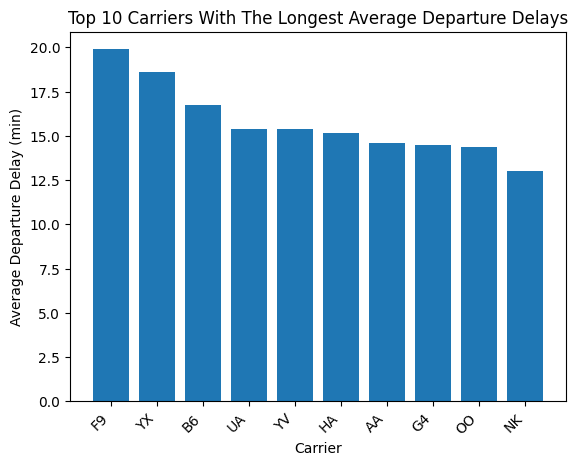

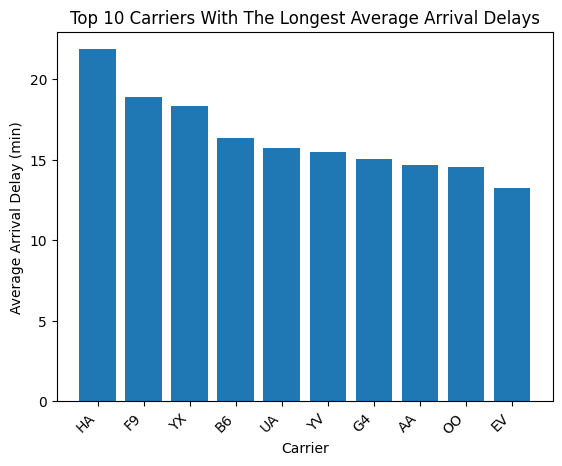

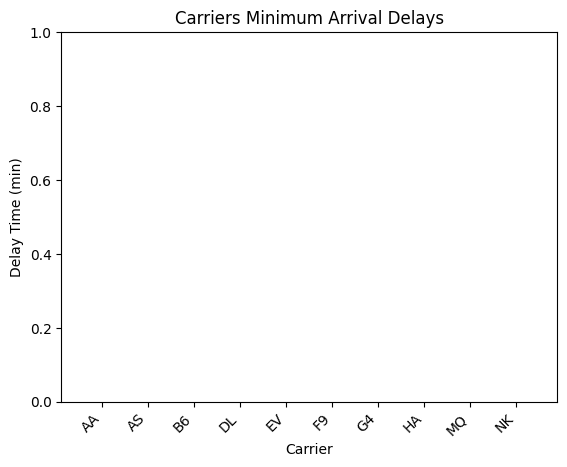

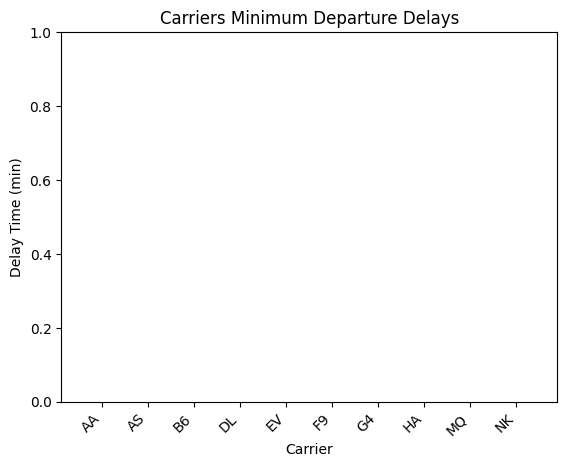

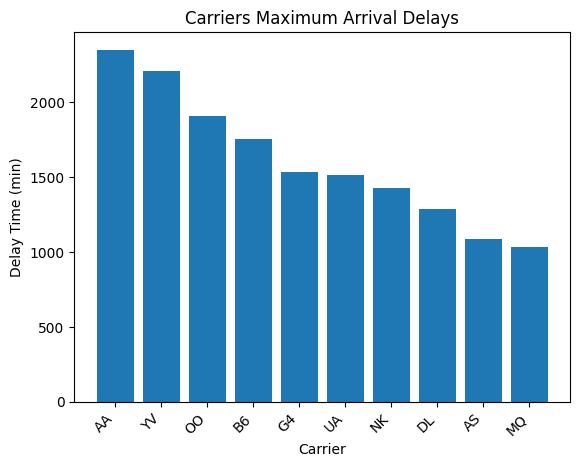

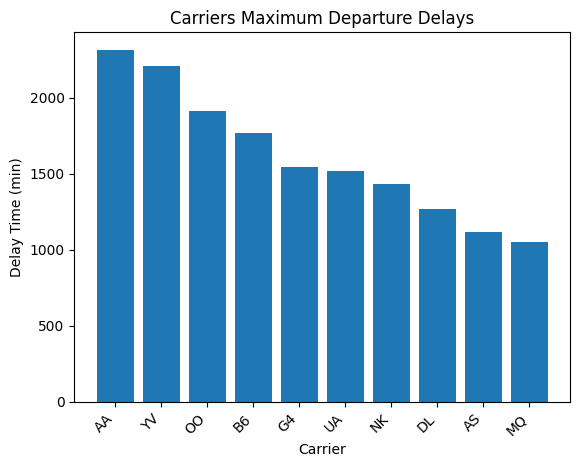

In [ ]:
import matplotlib.pyplot as plt

# average departure delay for carriers
depart_avg_delay = df.groupby("CARRIER_CODE")["DEP_DELAY"].mean().sort_values(ascending=False)

# get top 10 carriers with highest departure delays
longest_avg_depart_delays = depart_avg_delay.head(10)

# create bar plot of results
plt.bar(longest_avg_depart_delays.index, longest_avg_depart_delays.values)
plt.title("Top 10 Carriers With The Longest Average Departure Delays")
plt.xlabel("Carrier")
plt.ylabel("Average Departure Delay (min)")
plt.xticks(rotation=45, ha="right")
plt.show()

# average arrival delay for carriers
arrival_avg_delay = df.groupby("CARRIER_CODE")["ARR_DELAY"].mean().sort_values(ascending=False)

# get top 10 carriers with highest arrival delays
longest_avg_arrival_delays = arrival_avg_delay.head(10)

# create bar plot of results
plt.bar(longest_avg_arrival_delays.index, longest_avg_arrival_delays.values)
plt.title("Top 10 Carriers With The Longest Average Arrival Delays")
plt.xlabel("Carrier")
plt.ylabel("Average Arrival Delay (min)")
plt.xticks(rotation=45, ha="right")
plt.show()

# minimum arrival delay for carriers
min_arrive_delay = df.groupby(["CARRIER_CODE"])["ARR_DELAY"].min().sort_values(ascending=False)
min_delay_arr = min_arrive_delay.head(10)
plt.bar(min_delay_arr.index, min_delay_arr.values)
plt.title("Carriers Minimum Arrival Delays")
plt.xlabel("Carrier")
plt.ylabel("Delay Time (min)")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, min_delay_arr.max() + 1)
plt.show()

# minimum departure delay for carriers
min_departure_delay = df.groupby(["CARRIER_CODE"])["DEP_DELAY"].min().sort_values(ascending=False)
min_delay = min_departure_delay.head(10)
plt.bar(min_delay.index, min_delay.values)
plt.title("Carriers Minimum Departure Delays")
plt.xlabel("Carrier")
plt.ylabel("Delay Time (min)")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, min_delay.max() + 1)
plt.show()

# maximum arrival delay for carriers
max_arrive_delay = df.groupby(["CARRIER_CODE"])["ARR_DELAY"].max().sort_values(ascending=False)
max_delay = max_arrive_delay.head(10)
plt.bar(max_delay.index, max_delay.values)
plt.title("Carriers Maximum Arrival Delays")
plt.xlabel("Carrier")
plt.ylabel("Delay Time (min)")
plt.xticks(rotation=45, ha="right")
plt.show()

# maximum departure delay for carriers
max_departure_delay = df.groupby(["CARRIER_CODE"])["DEP_DELAY"].max().sort_values(ascending=False)
max_delay_dep = max_departure_delay.head(10)
plt.bar(max_delay_dep.index, max_delay_dep.values)
plt.title("Carriers Maximum Departure Delays")
plt.xlabel("Carrier")
plt.ylabel("Delay Time (min)")
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
# Filter the dataset for the top 10 carriers with the highest average arrival delay
top_10_carriers_arrival = arrival_avg_delay.head(10).index

# Calculate the mode of the state for each carrier based on arrival delay
arrival_state_mode = df[df['CARRIER_CODE'].isin(top_10_carriers_arrival)].groupby('CARRIER_CODE')['ORIGIN_ST'].agg(lambda x: x.mode().iloc[0])

# Filter the dataset for the top 10 carriers with the highest average departure delay
top_10_carriers_departure = depart_avg_delay.head(10).index

# Calculate the mode of the state for each carrier based on departure delay
departure_state_mode = df[df['CARRIER_CODE'].isin(top_10_carriers_departure)].groupby('CARRIER_CODE')['ORIGIN_ST'].agg(lambda x: x.mode().iloc[0])

# Display the results
print("Mode State for Top 10 Carriers with Highest Average Arrival Delay:")
print(arrival_state_mode)

print("\nMode State for Top 10 Carriers with Highest Average Departure Delay:")
print(departure_state_mode)

Mode State for Top 10 Carriers with Highest Average Arrival Delay:
CARRIER_CODE
AA    CA
B6    CA
EV    IL
F9    NV
G4    AZ
HA    CA
OO    CA
UA    CA
YV    AZ
YX    AZ
Name: ORIGIN_ST, dtype: string

Mode State for Top 10 Carriers with Highest Average Departure Delay:
CARRIER_CODE
AA    CA
B6    CA
F9    NV
G4    AZ
HA    CA
NK    NV
OO    CA
UA    CA
YV    AZ
YX    AZ
Name: ORIGIN_ST, dtype: string


<br>A pattern we noticed was that the carriers with the highest maximum departure delays were also the carriers with the highest maximum arrival delays where each carrier had very similar maximum arrival and departure delays. Another pattern we noticed was that the carriers with the minimum departure delays were also the carriers the the minimum arrival delays where the minimum arrival and departure delay was 0. Another pattern we found was that the carriers with the longest average arrival delays and carriers with the longest average departure delays had delays that tended to be between 12 minutes and 20 minutes with the exception of carrier HA with an average arrival delay of just over 20 minutes.</br>

<br>Based on the graphs, the carriers that are more prone to flight delays are F9, YX, B6, UA, YV, HA, AA, G4, and OO as these are the carriers with the longest average departure delay and longest average arrival delay.</br>

<br>Looking at the states where the longest average arrival and departure delays are happening for the top 10 in each, it seems that CA is the region where the delays are occuring most frequently.</br>

## Question 5 — (30 points)


1. Evaluate which airlines have the <b>best performance</b> in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".

2. For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines.
<b>Hint</b>: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.

Question 5.1

Our rationale for determining "the best performance" is by on-time performance: airlines with the lowest average arrival delay. Passengers are most affected by late arrivals since arrival delays may affect plans to meet someone or be somewhere on time, thus having the lowest average arrival delay would be our indicator of "the best performance".

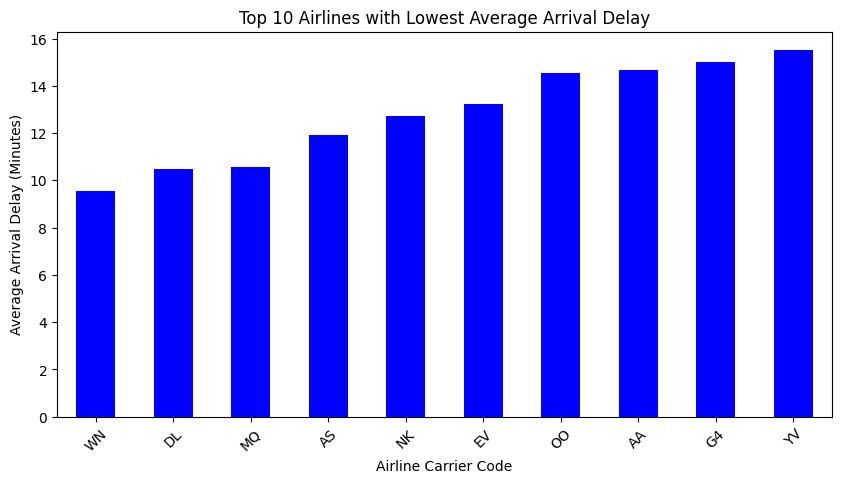

In [ ]:
# Group by airline and compute average delays
airline_performance = df.groupby('CARRIER_CODE')['ARR_DELAY'].mean()

# Get the top 10 airlines best on our definition of "the best performance"
top_airlines = airline_performance.sort_values().head(10)

# Plot the results
plt.figure(figsize=(10, 5))
top_airlines.plot(kind='bar', color='blue')
plt.title('Top 10 Airlines with Lowest Average Arrival Delay')
plt.xlabel('Airline Carrier Code')
plt.ylabel('Average Arrival Delay (Minutes)')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Question 5.2

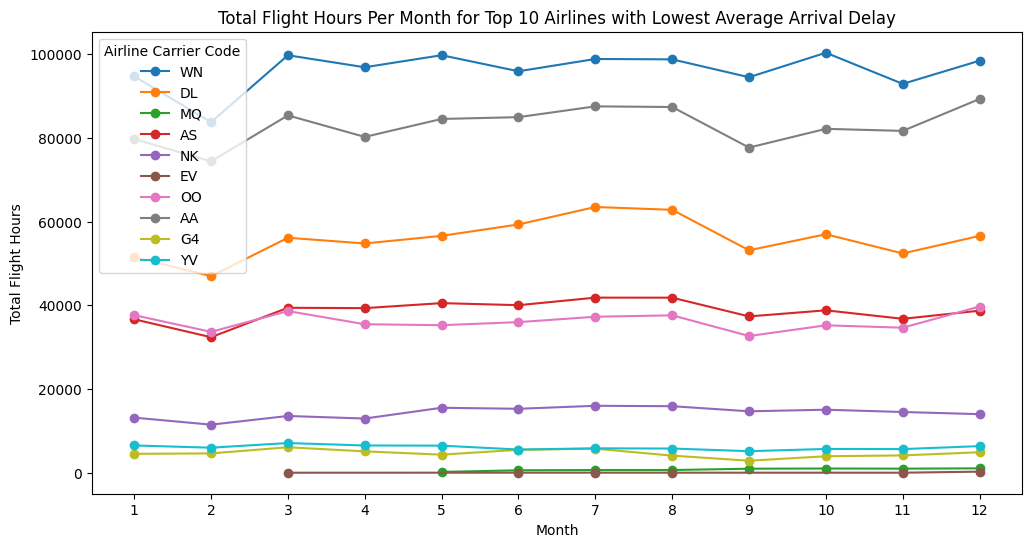

In [ ]:
# Ensure ELAPSED_TIME is in minutes and FL_DATE is in datetime format
df['ELAPSED_TIME'] = pd.to_numeric(df['ELAPSED_TIME'], errors='coerce')  # Ensure it's numeric
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')  # Convert to datetime

# Extract month from FL_DATE without modifying the original df
df_months = df.copy()  # Make a copy to avoid modifying original df
df_months['Month'] = df_months['FL_DATE'].dt.month  # Extract month from FL_DATE

# Convert ELAPSED_TIME to hours
df_months['FLIGHT_HOURS'] = df_months['ELAPSED_TIME'] / 60  # Convert minutes to hours

# Group by airline and month, and calculate the total flight hours for each combination
flight_hours = df_months.groupby(['CARRIER_CODE', 'Month'])['FLIGHT_HOURS'].sum().reset_index()

# Filter for the top 10 airlines based on lowest average arrival delay (top_airlines)
top_airlines = top_airlines.index  # Extract the airline codes of the top 10 airlines

# Filter the dataset to only include the top 10 airlines
top_airlines_flight_hours = flight_hours[flight_hours['CARRIER_CODE'].isin(top_airlines)]

# Plot the total flight hours for the top 10 airlines, by month
plt.figure(figsize=(12, 6))
for airline in top_airlines:
    airline_data = top_airlines_flight_hours[top_airlines_flight_hours['CARRIER_CODE'] == airline]
    plt.plot(airline_data['Month'], airline_data['FLIGHT_HOURS'], label=airline, marker='o')

plt.title('Total Flight Hours Per Month for Top 10 Airlines with Lowest Average Arrival Delay')
plt.xlabel('Month')
plt.ylabel('Total Flight Hours')
plt.legend(title='Airline Carrier Code')
plt.xticks(range(1, 13))  # Label months from 1 to 12
plt.show()

Looking at the graph, airlines that don't operate throughout the year, such as airlines EV and MQ have the lowest total flight hours. The rest of the airlines operate throughout the entire year. Airlines G4 and YV have very similar total flight hours at about 7,500 per month. Airline NK also consistently has about 11,000 total flight hours per month. Airline AS and OO also has very similar total flight hours per month and have similar drops and rises in total flight hours concurently. The top 3 airlines with the most total flight hours per month are airlines WN, AA, and DL where WN has the most total flight hours per month. Despite these top 3 airlines having total flight hours per month difference of over 10,000 per month, the tendency to increase and decrease total flight hours for certain months seem to be consistent throughout all 3 airlines.

## Question 6 — (20 points)


Select any THREE (3) aircraft***, and explore the data to analyze the following <b>for each aircraft</b>:

1. Indicate which airline operates the selected aircraft and where it often travels.
2. Arrival and departure delays at the airports where it traveled.
3. Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.
***<b>Note</b>: the <b>TAIL_NUM</b> can help you to identify each unique aircraft.

Question 6.1

In [ ]:
# find 3 unique aircraft using TAIL_NUM
selected_tail_nums = df['TAIL_NUM'].dropna().unique()[:3]

# Filter data for the selected TAIL_NUMs
df_selected = df[df['TAIL_NUM'].isin(selected_tail_nums)]

print('The three aircrafts we picked were: ' + selected_tail_nums[0] + ', '
      + selected_tail_nums[1] + ', '+ selected_tail_nums[2])

The three aircrafts we picked were: N916NN, N733UW, N140AN


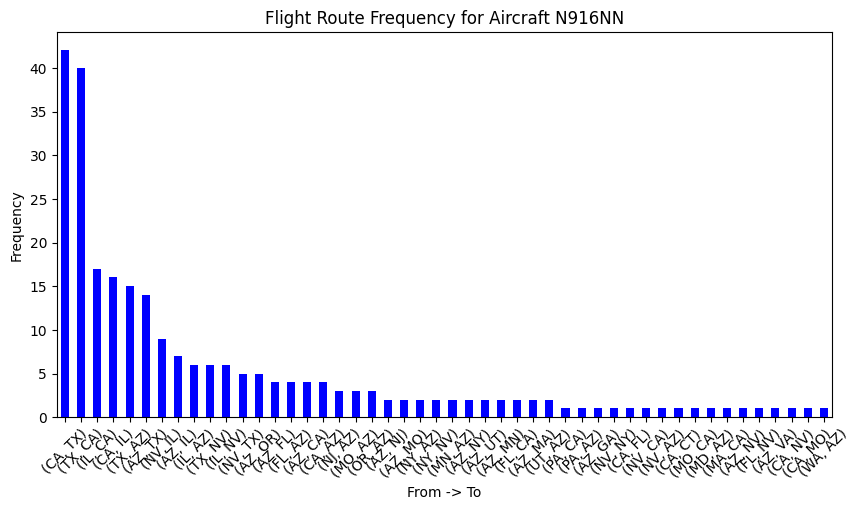

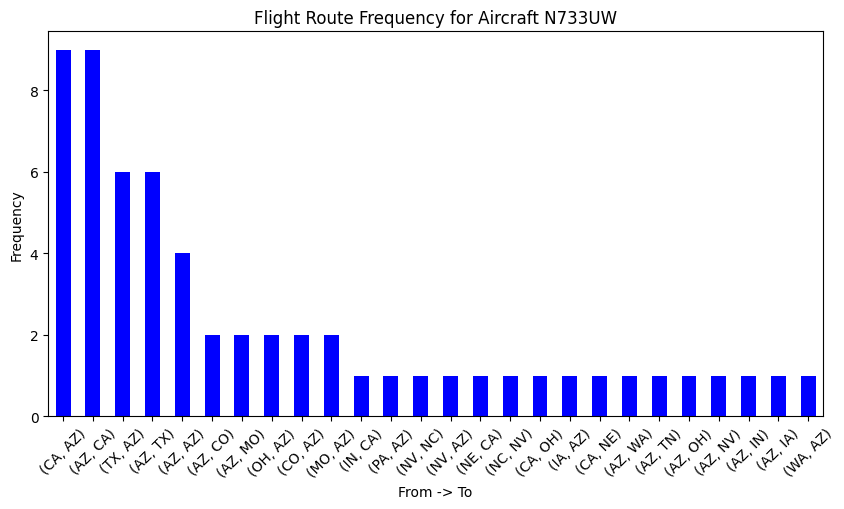

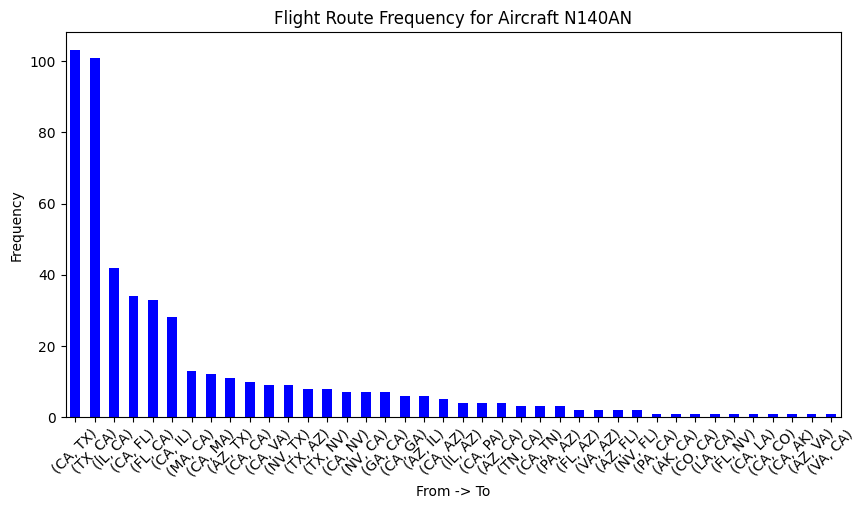

Airline AA operates the aircraft N916NN, and often travels from CA to TX
Airline AA operates the aircraft N733UW, and often travels from CA to AZ
Airline AA operates the aircraft N140AN, and often travels from CA to TX


In [ ]:
# Filter data for specified aircraft
aircraft_data0 = df[df['TAIL_NUM'] == selected_tail_nums[0]]
# Find which airline operates the specified aircraft
airline0 = aircraft_data0['CARRIER_CODE'].iloc[0]

# Count the frequency of each (ORIGIN_ST, DEST_ST) pair
route_counts0 = aircraft_data0.groupby(['ORIGIN_ST', 'DEST_ST']).size().sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 5))
route_counts0.plot(kind='bar', color='blue')
plt.title('Flight Route Frequency for Aircraft ' + selected_tail_nums[0])
plt.xlabel('From -> To')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Returns a tuple (ORIGIN_ST, DEST_ST) for most common travel
most_common_route0 = route_counts0.idxmax()
origin_state0, destination_state0 = most_common_route0


# Filter data for specified aircraft
aircraft_data1 = df[df['TAIL_NUM'] == selected_tail_nums[1]]
# Find which airline operates the specified aircraft
airline1 = aircraft_data1['CARRIER_CODE'].iloc[0]

# Count the frequency of each (ORIGIN_ST, DEST_ST) pair
route_counts1 = aircraft_data1.groupby(['ORIGIN_ST', 'DEST_ST']).size().sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 5))
route_counts1.plot(kind='bar', color='blue')
plt.title('Flight Route Frequency for Aircraft ' + selected_tail_nums[1])
plt.xlabel('From -> To')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Returns a tuple (ORIGIN_ST, DEST_ST) for most common travel
most_common_route1 = route_counts1.idxmax()
origin_state1, destination_state1 = most_common_route1

# Filter data for specified aircraft
aircraft_data2 = df[df['TAIL_NUM'] == selected_tail_nums[2]]
# Find which airline operates the specified aircraft
airline2 = aircraft_data2['CARRIER_CODE'].iloc[0]

# Count the frequency of each (ORIGIN_ST, DEST_ST) pair
route_counts2 = aircraft_data2.groupby(['ORIGIN_ST', 'DEST_ST']).size().sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 5))
route_counts2.plot(kind='bar', color='blue')
plt.title('Flight Route Frequency for Aircraft ' + selected_tail_nums[2])
plt.xlabel('From -> To')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Returns a tuple (ORIGIN_ST, DEST_ST) for most common travel
most_common_route2 = route_counts2.idxmax()
origin_state2, destination_state2 = most_common_route2

print('Airline ' + airline0 + ' operates the aircraft ' + selected_tail_nums[0]
      + ', and often travels from ' + origin_state0
      + ' to ' + destination_state0)
print('Airline ' + airline1 + ' operates the aircraft ' + selected_tail_nums[1]
      + ', and often travels from ' + origin_state1
      + ' to ' + destination_state1)
print('Airline ' + airline2 + ' operates the aircraft ' + selected_tail_nums[2]
      + ', and often travels from ' + origin_state2
      + ' to ' + destination_state2)

Question 6.2

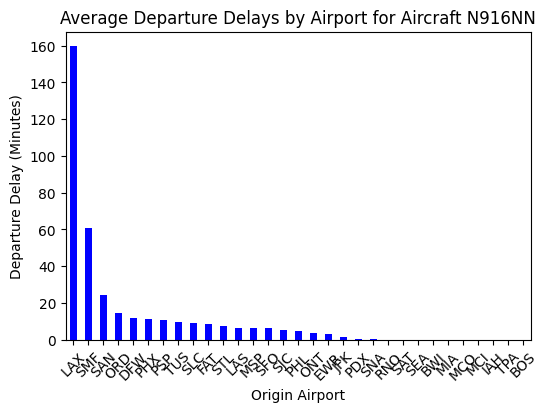

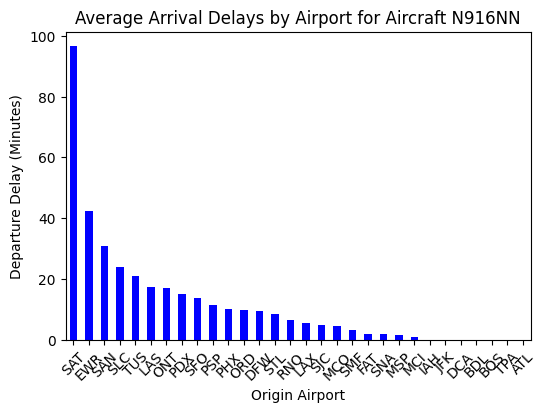

In [ ]:
# Remove outliers (DEP_DELAY > 300 minutes)
filtered_aircraft_data0 = aircraft_data0[aircraft_data0['ARR_DELAY'] <= 300]

# Group by airports and calculate delay statistics
departure_delays_aircraft0 = aircraft_data0.groupby('ORIGIN')['DEP_DELAY'].mean()
arrival_delays_aircraft0 = filtered_aircraft_data0.groupby('DEST')['ARR_DELAY'].mean()

# Plot departure delays
plt.figure(figsize=(6,4))
departure_delays_aircraft0.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Average Departure Delays by Airport for Aircraft ' + selected_tail_nums[0])
plt.xlabel('Origin Airport')
plt.ylabel('Departure Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()

# Plot arrival delays
plt.figure(figsize=(6,4))
arrival_delays_aircraft0.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Average Arrival Delays by Airport for Aircraft ' + selected_tail_nums[0])
plt.xlabel('Origin Airport')
plt.ylabel('Departure Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()

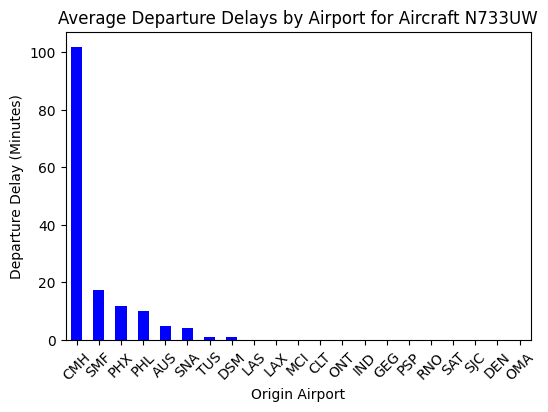

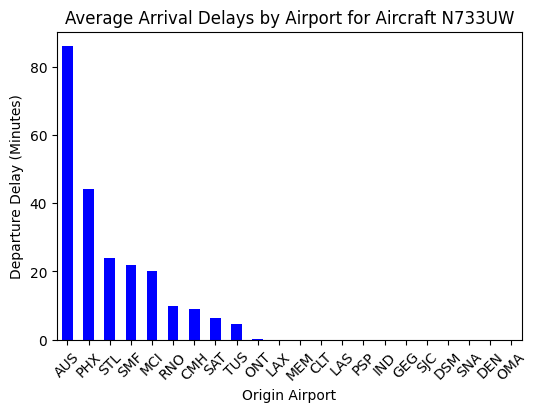

In [ ]:
# Remove outliers (DEP_DELAY > 300 minutes)
filtered_aircraft_data1 = aircraft_data1[aircraft_data1['DEP_DELAY'] <= 300]

# Group by airports and calculate delay statistics
departure_delays_aircraft1 = filtered_aircraft_data1.groupby('ORIGIN')['DEP_DELAY'].mean()
arrival_delays_aircraft1 = aircraft_data1.groupby('DEST')['ARR_DELAY'].mean()

# Plot departure delays
plt.figure(figsize=(6,4))
departure_delays_aircraft1.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Average Departure Delays by Airport for Aircraft ' + selected_tail_nums[1])
plt.xlabel('Origin Airport')
plt.ylabel('Departure Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()

# Plot arrival delays
plt.figure(figsize=(6,4))
arrival_delays_aircraft1.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Average Arrival Delays by Airport for Aircraft ' + selected_tail_nums[1])
plt.xlabel('Origin Airport')
plt.ylabel('Departure Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()

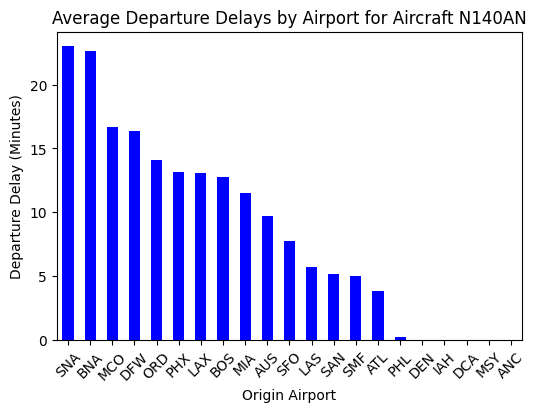

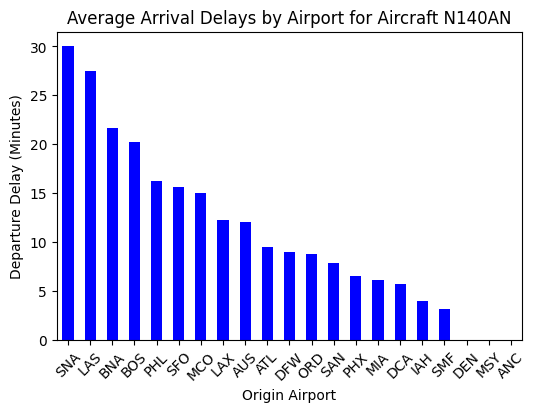

In [ ]:
# Group by airports and calculate delay statistics
departure_delays_aircraft2 = aircraft_data2.groupby('ORIGIN')['DEP_DELAY'].mean()
arrival_delays_aircraft2 = aircraft_data2.groupby('DEST')['ARR_DELAY'].mean()

# Plot departure delays
plt.figure(figsize=(6,4))
departure_delays_aircraft2.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Average Departure Delays by Airport for Aircraft ' + selected_tail_nums[2])
plt.xlabel('Origin Airport')
plt.ylabel('Departure Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()

# Plot arrival delays
plt.figure(figsize=(6,4))
arrival_delays_aircraft2.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Average Arrival Delays by Airport for Aircraft ' + selected_tail_nums[2])
plt.xlabel('Origin Airport')
plt.ylabel('Departure Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()

Question 6.3

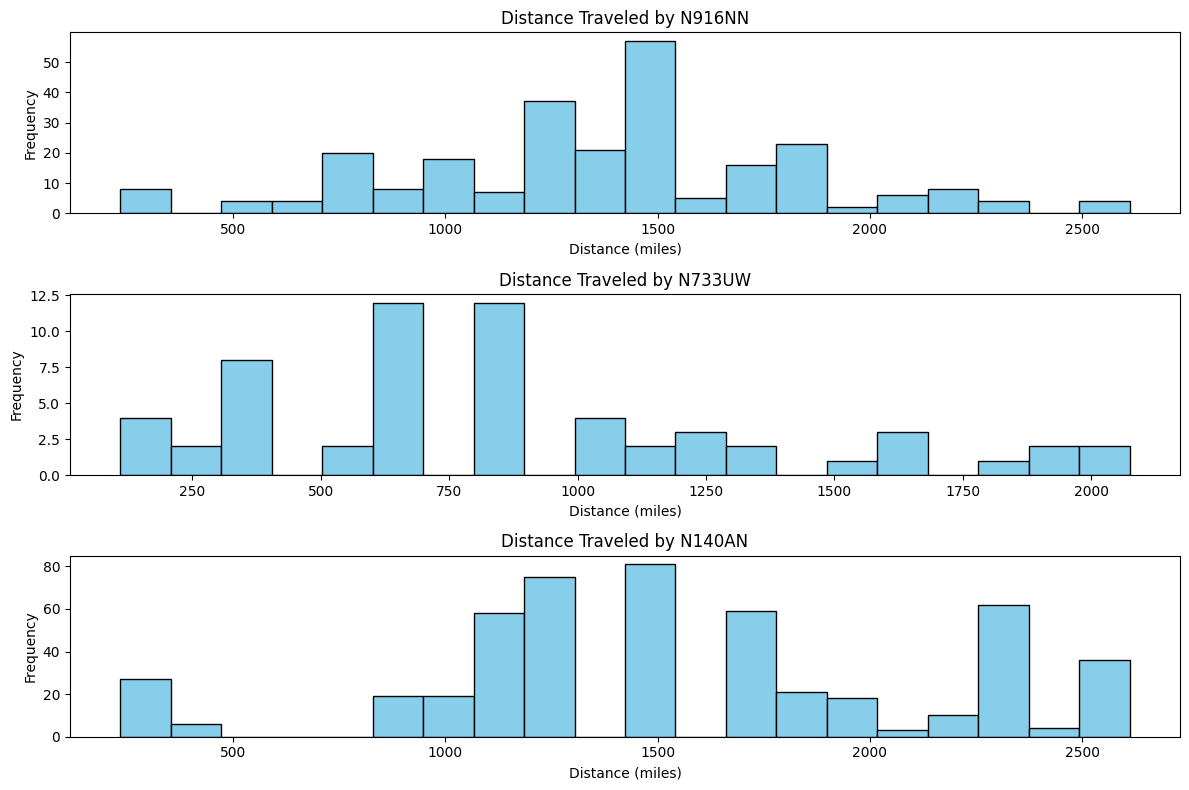

In [ ]:
# List of selected aircrafts
aircrafts = ['N916NN', 'N733UW', 'N140AN']

# Filter the dataset for the selected aircrafts
filtered_df = df[df['TAIL_NUM'].isin(aircrafts)]

# Create histograms for each aircraft's distance traveled
plt.figure(figsize=(12, 8))

for idx, aircraft in enumerate(aircrafts, 1):
    plt.subplot(3, 1, idx)  # Create 3 subplots (one for each aircraft)
    aircraft_data = filtered_df[filtered_df['TAIL_NUM'] == aircraft]
    plt.hist(aircraft_data['DISTANCE'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distance Traveled by {aircraft}')
    plt.xlabel('Distance (miles)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Create summary statistics on the distance traveled. Analyze all the results in
# 6.1-6.3 to identify any patterns that are evident.
# Explain your findings and visualize ALL results.

All three aircraft are seen to have distinct flight patterns and routes, and each aircraft focuses on its own unique set of routes. N916NN operates between major hubs like LAX and SAT, which is also where it experiences some of the longest delays. N733UW has shorter, regional routes, with a high concentration of flights between CA and AZ, and it shows significant delays at CMH and AUS. N140AN covers a wider range of mid to long distance routes, and its delays are more evenly spread across airports. The results show that each aircraft has different operational purposes, which effects where delays occur.

## Question 7 — Summary


Summarize the overall analysis and share THREE (3) key findings.


Overall, we were able to find that there was significant variability in delays depending on the type of aircraft, routes, and airports. As we explored and analyzed the data further, we were able to see patterns and correlations between departure and arrival delays at specific airports and differences in delay tendencies based on aircraft usage.

**Key Findings:**

We were able to find that the F9 airline had the second longest average arrival and the longest departure delays. This is correlated because if flights are constantly departing late, arrivals will be late as well since there is less space in the terminals, and vice versa.

We were also able to see that aircraft N916NN was experiencing the highest amount of delays, due to it traveling to major airports like LAX and SAT, which correlates with the idea that major airports will experience longer delays.

Finally, we were also able to see that California has the most air traffic, and the aircrafts that we selected tend to frequent California a lot. Airlines with the top 10 highest average departure and arrival delays tended to originate from California, indicating that high air traffic could be linked to high levels of delays.


## Helpful resources
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below.

You do not need to cite the official python documentation.
